In [1]:
import pandas as pd
import numpy as np
import re
import pprint
from collections import defaultdict

import string
from string import punctuation

import os

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import gensim
from gensim import corpora, models, similarities

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [2]:
df = pd.read_csv(r'C:\Users\Luca Nannini\Desktop/AllDebates.csv')
df.set_index("TURN STARTS", inplace= True)
first_debate = df.iloc[:131]
#first debate text:
debate = list(first_debate.TEXT)

# First Debate Overall LDA

In [3]:
debtok = [
     [word for word in document.lower().split()]
    for document in debate
 ]

In [4]:
debate = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       debtok]
# remove words less than two letters
debate = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       debate]
# remove punctuation
debate = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
                                    for y in debate]

# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['people','want','know','believe','you','really','lot','tell','young','stopandfrisk','that','get','got','much','many','put','kind','thanks','thank','think','well','nobody','take','taken','taking','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','seen','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)

cleaned_debate = [
     [word for word in document if word not in stoplist]
    for document in debate
 ]

In [5]:
dictionary = corpora.Dictionary(cleaned_debate)
corpus = [dictionary.doc2bow(text) for text in cleaned_debate]

total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics, passes=50, per_word_topics=True)

In [6]:
lda.show_topics(total_topics,10)

[(0,
  '0.012*"country" + 0.008*"need" + 0.005*"bad" + 0.005*"world" + 0.005*"donald" + 0.005*"give" + 0.005*"great" + 0.005*"nuclear" + 0.005*"happen" + 0.005*"come"'),
 (1,
  '0.010*"nato" + 0.008*"iran" + 0.007*"country" + 0.007*"police" + 0.007*"need" + 0.006*"president" + 0.006*"donald" + 0.005*"deal" + 0.005*"order" + 0.005*"two"'),
 (2,
  '0.010*"country" + 0.007*"secretary" + 0.007*"business" + 0.007*"time" + 0.007*"jobs" + 0.007*"trade" + 0.007*"russia" + 0.006*"deal" + 0.006*"years" + 0.006*"never"'),
 (3,
  '0.010*"war" + 0.008*"isis" + 0.007*"campaign" + 0.006*"defend" + 0.006*"country" + 0.005*"release" + 0.005*"community" + 0.004*"temperament" + 0.004*"website" + 0.004*"support"'),
 (4,
  '0.015*"jobs" + 0.015*"country" + 0.014*"tax" + 0.011*"companies" + 0.011*"years" + 0.010*"leaving" + 0.009*"back" + 0.007*"economy" + 0.007*"work" + 0.006*"million"')]

### First Debate Semantic Heatmap

In [7]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [8]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(92, 5)
(5, 92)


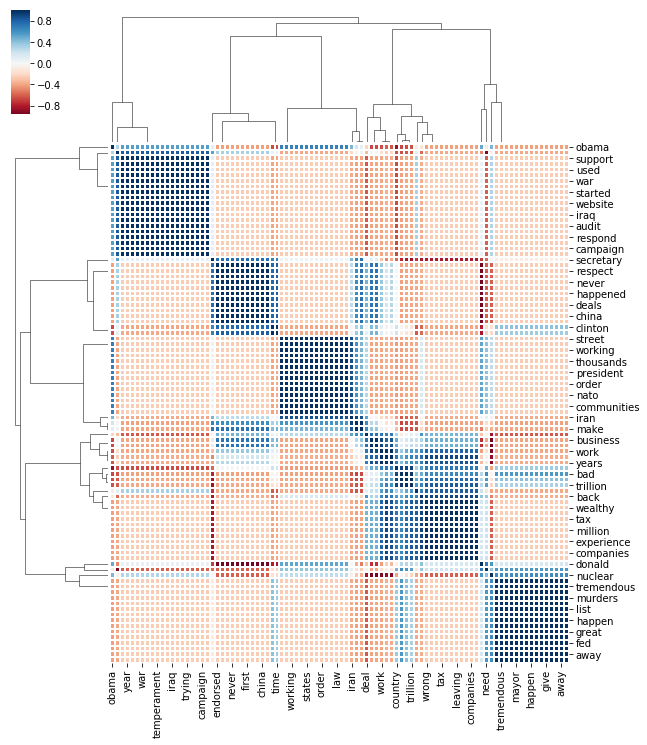

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=1, figsize=(10, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

### First Debate pyLDAvis

In [10]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='TSNE')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      391.883179 -438.306152       1        1  23.845797
0     -149.754089  373.837280       2        1  23.247652
1     -323.216492 -166.202148       3        1  18.386307
2     -133.073410 -700.507507       4        1  17.541943
3      382.625305  127.154243       5        1  16.978300, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
148   Default  12.000000      leaving  12.000000  30.0000  30.0000
234   Default  24.000000          tax  24.000000  29.0000  29.0000
1498  Default  10.000000         nato  10.000000  28.0000  28.0000
57    Default  27.000000         jobs  27.000000  27.0000  27.0000
1599  Default  11.000000          war  11.000000  26.0000  26.0000
19    Default  17.000000    companies  17.000000  25.0000  25.0000
179   Default  12.000000        trade  12.000000  24.0000  24.0000
1344  Default  12.000000         iran  12.000000  23.0000  23.0000
560   Default  14.000000         isis  14.000000  22.0000  22.0000
1365  Default   9.000000       russia   9.000000  21.0000  21.0000
468   Default  13.000000          bad  13.000000  20.0000  20.0000
943   Default  13.000000       police  13.000000  19.0000  19.0000
1329  Default   6.000000       defend   6.000000  18.0000  18.0000
127   Default   9.000000        deals   9.000000  17.0000  17.0000
176   Default   8.000000        taxes   8.000000  16.0000  16.0000
201   Default   6.000000   experience   6.000000  15.0000  15.0000
534   Default   6.000000  regulations   6.000000  14.0000  14.0000
1019  Default   8.000000    community   8.000000  13.0000  13.0000
10    Default  16.000000     business  16.000000  12.0000  12.0000
832   Default   8.000000     campaign   8.000000  11.0000  11.0000
295   Default  23.000000        years  23.000000  10.0000  10.0000
1327  Default   7.000000        cyber   7.000000   9.0000   9.0000
380   Default  17.000000         deal  17.000000   8.0000   8.0000
1748  Default   6.000000      stamina   6.000000   7.0000   7.0000
29    Default  12.000000      economy  12.000000   6.0000   6.0000
1342  Default   7.000000  information   7.000000   5.0000   5.0000
100   Default   9.000000      wealthy   9.000000   4.0000   4.0000
317   Default  17.000000         back  17.000000   3.0000   3.0000
1393  Default   4.000000     endorsed   4.000000   2.0000   2.0000
1693  Default   4.000000        north   4.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
1222   Topic5   2.943461         true   4.240511   1.4081  -5.6580
30     Topic5   2.943430     election   4.240510   1.4081  -5.6580
551    Topic5   3.648262      website   5.698909   1.3272  -5.4433
706    Topic5   4.346543      release   7.212214   1.2668  -5.2682
560    Topic5   7.156625         isis  14.897608   1.0401  -4.7695
1148   Topic5   2.943641      respond   5.013664   1.2407  -5.6579
1019   Topic5   4.345136    community   8.745014   1.0738  -5.2685
1213   Topic5   2.242622         week   3.539705   1.3168  -5.9299
543    Topic5   2.242600         left   3.539706   1.3168  -5.9299
1558   Topic5   2.242680      article   3.550739   1.3138  -5.9299
847    Topic5   2.242902      manager   3.589827   1.3029  -5.9298
725    Topic5   2.242819      foreign   3.589833   1.3029  -5.9298
1431   Topic5   3.645452         iraq   7.173380   1.0963  -5.4441
89     Topic5   3.647073      support   7.903427   0.9999  -5.4436
666    Topic5   2.943848        audit   5.706200   1.1114  -5.6578
692    Topic5   2.943720         year   5.710418   1.1106  -5.6579
909    Topic5   2.943734         used   5.721454   1.1087  -5.6579
231    Topic5   3.644854      started   8.656936   0.9082  -5.4442
269    Topic5   2.943784     greatest   5.771589   1.1000  -5.6578
413    Topic5   3.645590        obama  13.006330   0.5013  -5.4440


### First Debate Topic WordCloud

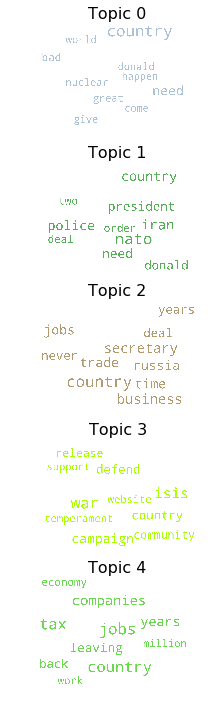

In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2000,
                  height=1400,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### FastText Debate Word Embeddings 

In [24]:
from gensim.models import FastText
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

model = FastText(cleaned_debate, size=100, window=50, min_count=10, workers=6)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\fasttext.py:273: DeprecationWarning:

Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\fasttext.py:396: DeprecationWarning:

Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\fasttext.py:400: DeprecationWarning:

Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\fasttext.py:409: DeprecationWarning:

Call to deprecated `min_n` (Attribute will be removed in 4.0.0, use wv.min_n instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\fasttext.py:409: DeprecationWarning:

Call to deprecated `max_n` (Attribute will be removed in 4.0.0, use wv.max_n instead).

C:\Us

FastText(vocab=78, size=100, alpha=0.025)


C:\Users\Luca Nannini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



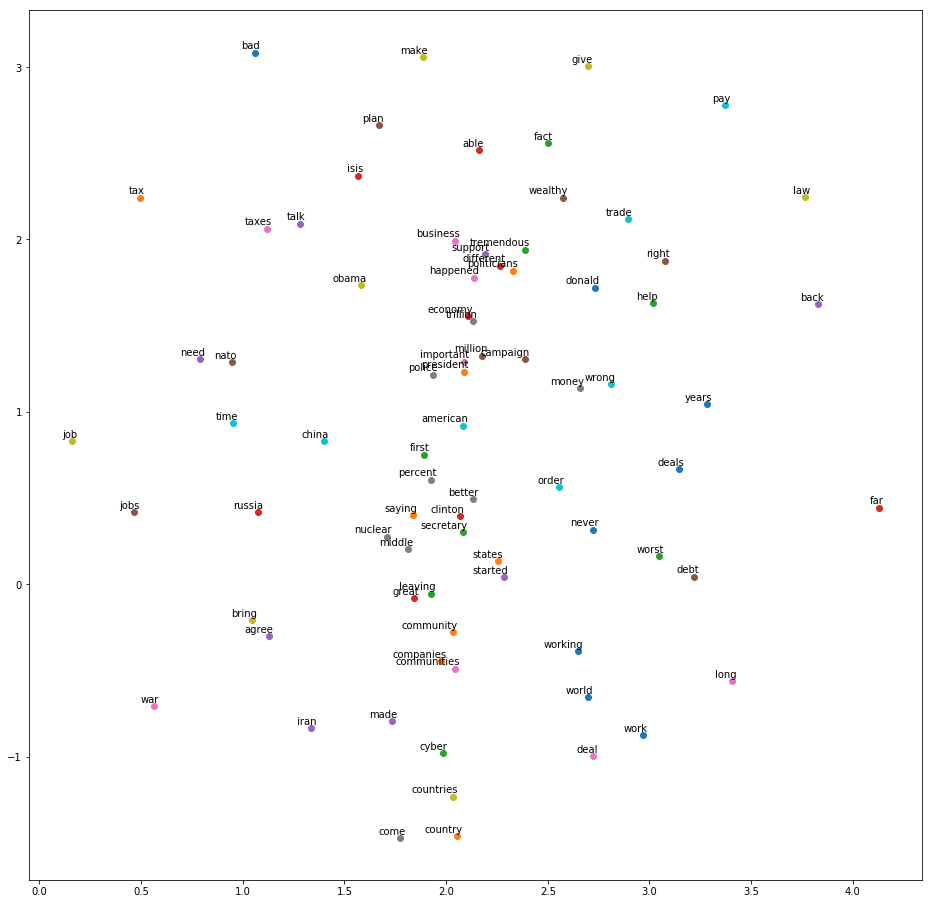

In [25]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model)

***

# LDA analysis of each segment

- Achieving Prosperity: jobs creation, bringing back expatriated American manufacturers, tax policy.
- Candidates private scandals: Trump’s tax return release, Clinton’s e-mails scandal.
- America’s Direction: healing race relations, police bias, Trump’s questioning Obama’s birth certificate legitimacy.
- Securing America: national institutions cyber attacks, ISIS, homegrown terroristic attacks, Iraq War, nuclear weapons policy.
- Mutual Acceptance & Election Outcome: Trump’s opinion on Clinton’s public figure, acceptance of election outcome.
 ***

In [14]:
Deb_I = list(first_debate.loc['09:04:52':'09:30:11'].TEXT)

In [15]:
Deb_I = [
     [word for word in document.lower().split()]
    for document in Deb_I
 ]

Deb_I = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_I]
# remove words less than two letters
Deb_I = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_I]
# remove punctuation
Deb_I = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_I]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_I = [
     [word for word in document if word not in stoplist]
    for document in Deb_I
 ]

<>:12: DeprecationWarning:

invalid escape sequence \.

<>:12: DeprecationWarning:

invalid escape sequence \.

<>:12: DeprecationWarning:

invalid escape sequence \.

<ipython-input-15-afb5dd0e8724>:12: DeprecationWarning:

invalid escape sequence \.



In [16]:
dictionaryI = corpora.Dictionary(Deb_I)
corpusI = [dictionaryI.doc2bow(text) for text in Deb_I]

total_topics = 3
lda_I = models.LdaModel(corpusI, id2word=dictionaryI, num_topics=total_topics)

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_i

In [17]:
lda_I.show_topics(total_topics,10)

[(0,
  '0.016*"jobs" + 0.012*"want" + 0.010*"tax" + 0.010*"regulations" + 0.010*"people" + 0.010*"companies" + 0.009*"years" + 0.009*"nafta" + 0.009*"country" + 0.008*"business"'),
 (1,
  '0.017*"jobs" + 0.014*"country" + 0.010*"tax" + 0.010*"leaving" + 0.009*"trade" + 0.009*"companies" + 0.009*"economy" + 0.008*"people" + 0.008*"back" + 0.007*"debt"'),
 (2,
  '0.015*"jobs" + 0.014*"country" + 0.011*"secretary" + 0.010*"work" + 0.010*"companies" + 0.009*"money" + 0.009*"back" + 0.008*"people" + 0.008*"tax" + 0.008*"bring"')]

***

In [18]:
Deb_II = list(first_debate.loc['09:31:38':'09:41:42'].TEXT)

In [19]:
Deb_II = [
     [word for word in document.lower().split()]
    for document in Deb_II
 ]
Deb_II = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_II]
# remove words less than two letters
Deb_II = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_II]
# remove punctuation
Deb_II = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_II]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_II = [
     [word for word in document if word not in stoplist]
    for document in Deb_II
 ]

<>:11: DeprecationWarning:

invalid escape sequence \.

<>:11: DeprecationWarning:

invalid escape sequence \.

<>:11: DeprecationWarning:

invalid escape sequence \.

<ipython-input-19-5f1f42059001>:11: DeprecationWarning:

invalid escape sequence \.



In [21]:
dictionaryII = corpora.Dictionary(Deb_II)
corpusII = [dictionaryII.doc2bow(text) for text in Deb_II]

total_topics = 3
lda_II = models.LdaModel(corpusII, id2word=dictionaryII, num_topics=total_topics)


#IF: (IndexError: index 391 is out of bounds for axis 1 with size 386) THEN shut down and restart the kernel

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

C:\Users\Luca Nannini\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_i

In [23]:
lda_II.show_topics(total_topics,10)

[(0,
  '0.017*"business" + 0.014*"people" + 0.011*"release" + 0.011*"country" + 0.008*"laws" + 0.008*"returns" + 0.007*"audit" + 0.007*"tax" + 0.007*"talk" + 0.007*"money"'),
 (1,
  '0.025*"country" + 0.015*"tax" + 0.011*"people" + 0.010*"income" + 0.009*"release" + 0.009*"returns" + 0.009*"audit" + 0.008*"paid" + 0.008*"land" + 0.008*"money"'),
 (2,
  '0.014*"tax" + 0.013*"country" + 0.013*"years" + 0.012*"returns" + 0.011*"people" + 0.009*"business" + 0.007*"federal" + 0.007*"income" + 0.007*"wrong" + 0.007*"million"')]

***

In [ ]:
Deb_III = list(first_debate.loc['09:44:06':'10:04:10'].TEXT)

In [ ]:
Deb_III = [
     [word for word in document.lower().split()]
    for document in Deb_III
 ]
Deb_III = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_III]
# remove words less than two letters
Deb_III = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_III]
# remove punctuation
Deb_III = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_III]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_III = [
     [word for word in document if word not in stoplist]
    for document in Deb_III
 ]

In [ ]:
dictionaryIII = corpora.Dictionary(Deb_III)
corpusIII = [dictionaryI.doc2bow(text) for text in Deb_III]

total_topics = 3
lda_III = models.LdaModel(corpusIII, id2word=dictionaryIII, num_topics=total_topics)

In [ ]:
lda5.show_topics(total_topics,10)

*** 
<br>

In [ ]:
Deb_IV = list(first_debate.loc['10:06:26':'10:31:51'].TEXT)

In [ ]:
Deb_IV = [
     [word for word in document.lower().split()]
    for document in Deb_IV
 ]
Deb_IV = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_IV]
# remove words less than two letters
Deb_IV = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_IV]
# remove punctuation
Deb_IV = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_IV]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_IV = [
     [word for word in document if word not in stoplist]
    for document in Deb_IV
 ]

In [ ]:
dictionaryIV = corpora.Dictionary(Deb_IV)
corpusIV = [dictionaryIV.doc2bow(text) for text in Deb_IV]

total_topics = 3
lda_IV = models.LdaModel(corpusIV, id2word=dictionaryIV, num_topics=total_topics)

In [ ]:
lda_IV.show_topics(total_topics,10)

*** 
<br>

In [ ]:
Deb_V = list(first_debate.loc['10:33:04':'10:37:43'].TEXT)

In [ ]:
Deb_V = [
     [word for word in document.lower().split()]
    for document in Deb_V
 ]
Deb_V = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_V]
# remove words less than two letters
Deb_V = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_V]
# remove punctuation
Deb_V = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_V]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_V = [
     [word for word in document if word not in stoplist]
    for document in Deb_V
 ]

In [ ]:
dictionaryV = corpora.Dictionary(Deb_V)
corpusV = [dictionaryV.doc2bow(text) for text in Deb_V]

total_topics = 2
lda_V = models.LdaModel(corpusV, id2word=dictionaryV, num_topics=total_topics)

In [ ]:
lda_V.show_topics(total_topics,10)